In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from sympy import symbols, Eq, solve
import random
from mpmath import findroot
import cmath
sns.set()
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15, 
                     'figure.figsize': (8, 8)})

sns.set_style("ticks")

Dodajemy czynnik, który zaczyna wpływać na życie pary w konkretnym momencie w czasie.

$$\frac{dx}{dt} = r_1\left(x_0-x\right)+I_1\left(y\right) + k_1xy H\left(t-T\right)$$
$$\frac{dy}{dt} = r_2\left(y_0-y\right)+I_2\left(x\right) + k_2xy H\left(t-T\right).$$

Wezmę funkcję wpływu jak w związku Validating - najbardziej podstawowa.

$$\frac{dx}{dt} = r_1\left(x_0-x\right) + a_1y+k_1xyH\left(t-T\right)$$
$$\frac{dy}{dt} = r_2\left(y_0-y\right) + a_2x+k_2xyH\left(t-T\right).$$

Ale teraz nie mamy do czynienia z równaniami autonomicznymi, więc nie jesteśmy w stanie wyznaczyć punktów stacjonarnych ani powiedzieć nic o stabilności rozwiązań. W związku z tym będziemy badać zachowanie układu od momentu T, tak aby jednak móc przeanalizować stabilność - dokonujemy przesunięcia okna czasowego. Teraz mamy układ równań autonomicznych, nieliniowych.

### Stabilność

In [3]:
def MC(a1, a2, r1, r2, x0, y0, k1, k2, epsilon, N):
    
    array_x = np.zeros(100)
    array_y = np.zeros(100)
    array_t = np.zeros(100)
    
    for i in range(N):
        x00 = random.uniform(x0-epsilon, x0+epsilon)
        y00 = random.uniform(y0-epsilon, y0+epsilon)

        array_t += rhs1(a1, a2, r1, r2, x0, y0, k1, k2, x00, y00).t
        array_x += rhs1(a1, a2, r1, r2, x0, y0, k1, k2, x00, y00).y.T[:, 0]
        array_y += rhs1(a1, a2, r1, r2, x0, y0, k1, k2, x00, y00).y.T[:, 1]
        
    array_t = array_t/N
    array_x = array_x/N  
    array_y = array_y/N
    
    return array_t, array_x, array_y

In [4]:
def I1(a1, x):
    return a1*x

def I2(a2, y):
    return a2*y

In [5]:
def rhs1(a1, a2, r1, r2, x0, y0, k1, k2, x00, y00):
    
    def eq(s, v):
        return [r1*(x0-v[0])+I1(a1,v[1])+k1*v[0]*v[1], r2*(y0-v[1]) + I2(a2,v[0])+k2*v[0]*v[1]]
    
    res = solve_ivp(eq, (0, 20), [x00, y00], t_eval=np.linspace(0, 20, 100))
    return res

In [164]:
def critical(a1, a2, r1, r2, x0, y0, k1, k2):
    
    def equations(p):
        x, y = p
        return (r1*(x0-x)+a1*I1(a1,y)+k1*x*y, r2*(y0-y) + a2*I2(a2,x)+k2*x*y)

    x, y = fsolve(equations, (x0, y0))
    
    return x, y

In [179]:
def stability(a1, a2, r1, r2, x0, y0, k1, k2):
    delta1 = (k1*r2*y0-r1*r2+a1*a2-k2*x0*r1)**2-4*(a2*k1+k2*r1)*(r2*y0*a1+r1*r2*x0)
    x1 = (-k1*r2*y0+r1*r2-a1*a2+k2*x0*r1+cmath.sqrt(delta1))/(2*(a2*k1+k2*r1))
    x2 = (-k1*r2*y0+r1*r2-a1*a2+k2*x0*r1-cmath.sqrt(delta1))/(2*(a2*k1+k2*r1))
    y1 = r1*(x1-x0)/(a1+k1*x1)
    y2 = r1*(x2-x0)/(a1+k1*x2)
    # mamy punkty stacjonarne: (x1, y1), (x2, y2)
    
    delta2_1 = (-k1*y1+r1-k2*x1+r2)**2-4*((k1*y1-r1)*(k2*x1-r2)-(k1*x1+a1)*(k2*y1+a2))
    delta2_2 = (-k1*y2+r1-k2*x2+r2)**2-4*((k1*y2-r1)*(k2*x2-r2)-(k1*x2+a1)*(k2*y2+a2))
    
    
    l1_1 = ((k1*y1-r1+k2*x1-r2)+cmath.sqrt(delta2_1))/2
    l1_2 = ((k1*y1-r1+k2*x1-r2)-cmath.sqrt(delta2_1))/2
    
    l2_1 = ((k1*y2-r1+k2*x2-r2)+cmath.sqrt(delta2_2))/2
    l2_2 = ((k1*y2-r1+k2*x2-r2)-cmath.sqrt(delta2_2))/2
    
#     if l1_1.real<0 and l1_2.real<0 and l2_1.real<0 and l2_2.real<0:
#         return True
#     else:
#         return l1_1, l1_2, l2_1, l2_2

    return l1_1, l1_2, l2_1, l2_2, x1, y1, x2, y2


In [178]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3

x0 = 2
y0 = 3
k1 = 0.01
k2 = 0.01

stability(a1, a2, r1, r2, x0, y0, k1, k2)

# co to za przypadek?

(0.1489504018867429j,
 (-0.8333333333333333+1.3877787807814457e-17j),
 -0.1489504018867429j,
 (-0.8333333333333333-1.3877787807814457e-17j))

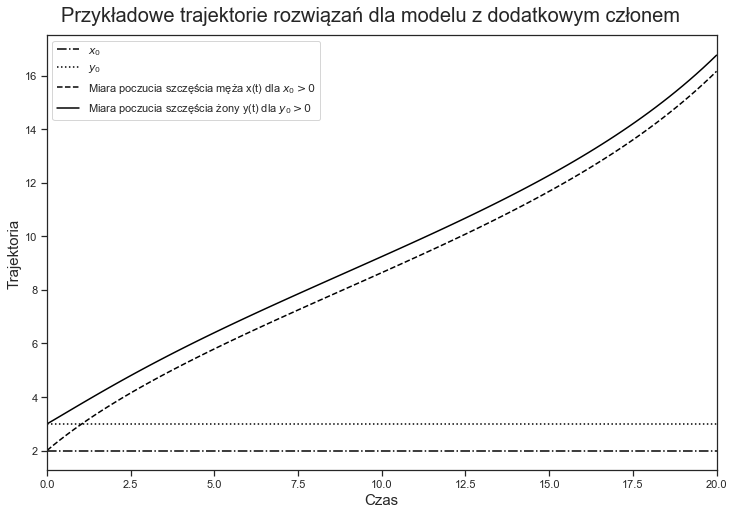

In [6]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5

x0 = 2
y0 = 3
k1 = 0.01
k2 = 0.01
N = 10000

array_t, array_x, array_y = MC(a1, a2, r1, r2, x0, y0, k1, k2, epsilon, N)


fig, ax1 = plt.subplots(1,1, figsize=(12,8))
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} > 0$")
ax1.plot(array_t, array_y, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
ax1.set_xlim(0,20)
fig.suptitle('Przykładowe trajektorie rozwiązań dla modelu z dodatkowym członem', fontsize = 20,
            y=0.93)
fig.savefig("random1.pdf")
plt.show()

In [180]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3

x0 = -2
y0 = -3
k1 = 0.01
k2 = 0.07

stability(a1, a2, r1, r2, x0, y0, k1, k2)

# 1 punkt stacjonarny: siodło
# 2 punkt stacjonarny: węzeł stabilny

((0.44567470451399827+0j),
 (-0.8985546557941858+0j),
 (-0.46583730934903733+0j),
 (-0.859662961024654+0j),
 (6.317634386082262+0j),
 (10.488564169405414+0j),
 (-4.129228588980813+0j),
 (-3.645426914503452+0j))

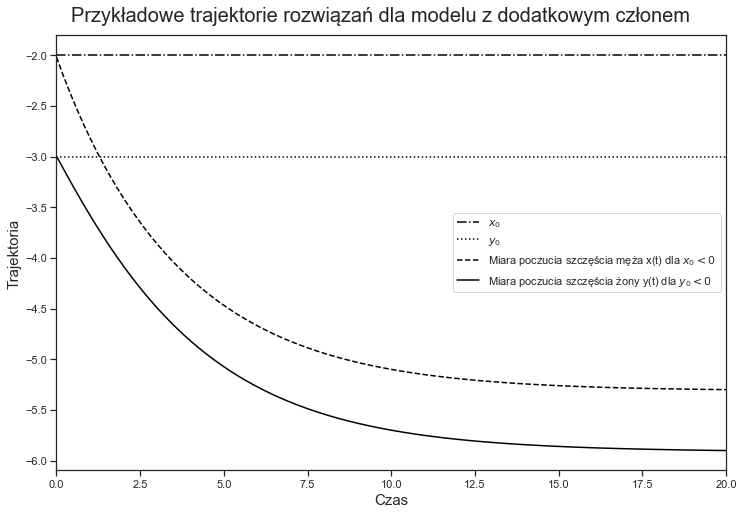

In [7]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5

x0 = -2
y0 = -3
k1 = 0.01
k2 = 0.01
N = 10000

array_t, array_x, array_y = MC(a1, a2, r1, r2, x0, y0, k1, k2, epsilon, N)


fig, ax1 = plt.subplots(1,1, figsize=(12,8))
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t, array_y, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} < 0$")
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
ax1.set_xlim(0,20)
fig.suptitle('Przykładowe trajektorie rozwiązań dla modelu z dodatkowym członem', fontsize = 20,
            y=0.93)
fig.savefig("random2.pdf")
plt.show()

In [169]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3

x0 = -5
y0 = 2
k1 = 0.01
k2 = 0.07

stability(a1, a2, r1, r2, x0, y0, k1, k2)

# 1 punkt stacjonarny: siodło
# 2 punkt stajconarny: węzeł stabilny

((0.391480952758827+0j),
 (-0.964880741341515+0j),
 (-0.36686391681462854+0j),
 (-1.029625467663212+0j))

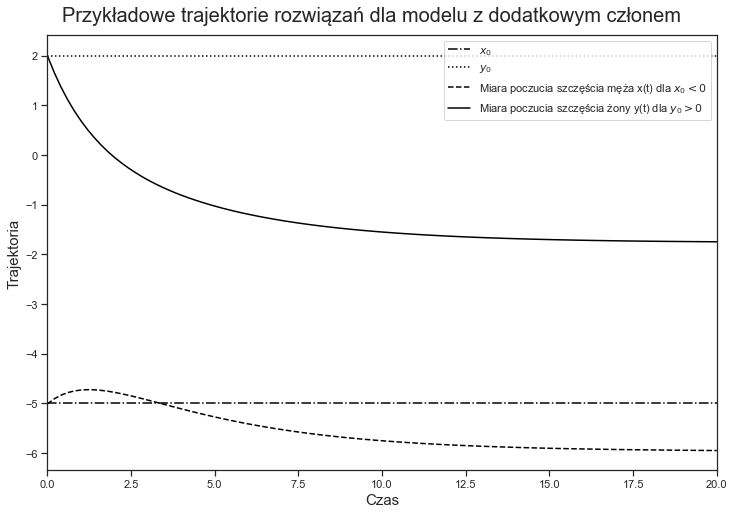

In [8]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5

x0 = -5
y0 = 2
k1 = 0.01
k2 = 0.01
N = 10000

array_t, array_x, array_y = MC(a1, a2, r1, r2, x0, y0, k1, k2, epsilon, N)


fig, ax1 = plt.subplots(1,1, figsize=(12,8))
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t, array_y, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
ax1.set_xlim(0,20)
fig.suptitle('Przykładowe trajektorie rozwiązań dla modelu z dodatkowym członem', fontsize = 20,
            y=0.93)
fig.savefig("random3.pdf")
plt.show()